
# EXPLORATORY DATA ANALYSIS OF FOOD PREFERENCE



In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food-preferences/Food_Preference.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import altair as alt



import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/food-preferences/Food_Preference.csv')
df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


At first we will convert the Timestamp column to dateframe object 

In [4]:
df['Timestamp'] = pd.to_datetime(df.Timestamp)

Then we will extract the day of the week from the dataframe

In [5]:
df['day'] = pd.Series(df.Timestamp).dt.day_name()


In [6]:
df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,day
0,2019-05-07 14:59:13-08:00,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Tuesday
1,2019-05-07 14:59:45-08:00,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes,Tuesday
2,2019-05-07 15:00:05-08:00,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe,Tuesday
3,2019-05-07 15:00:11-08:00,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Tuesday
4,2019-05-07 15:02:50-08:00,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Tuesday
...,...,...,...,...,...,...,...,...,...
283,2019-05-10 09:24:00-08:00,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes,Friday
284,2019-05-10 09:32:54-08:00,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes,Friday
285,2019-05-10 12:09:17-08:00,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes,Friday
286,2019-05-10 12:52:17-08:00,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes,Friday


In [7]:
df = df[['Gender','Nationality','Age','Food','Juice','Dessert','day']]
df

,Gender,Nationality,Age,Food,Juice,Dessert,day
0,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Tuesday
1,Female,Indian,22,Western Food,Carbonated drinks,Yes,Tuesday
2,Male,Indian,31,Western Food,Fresh Juice,Maybe,Tuesday
3,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Tuesday
4,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Tuesday
...,...,...,...,...,...,...,...
283,Male,Indian,27,Western Food,Fresh Juice,Yes,Friday
284,Male,Indian,24,Traditional food,Fresh Juice,Yes,Friday
285,Male,Indian,25,Traditional food,Fresh Juice,Yes,Friday
286,Male,Indian,27,Traditional food,Fresh Juice,Yes,Friday


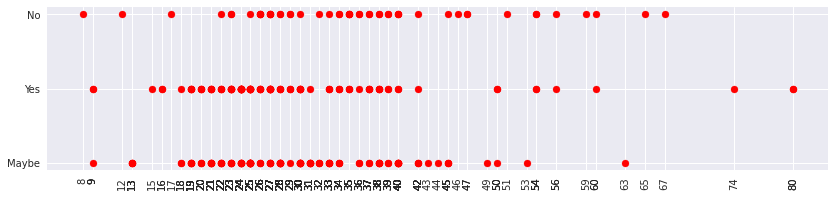

In [8]:
plt.style.use('seaborn')
plt.figure(figsize = (14,3))

plt.scatter(df.Age,df.Dessert,c='r')
plt.xticks(df.Age,rotation = 90)
plt.show()

# Insight

From the above graph we can infer that most of the people have preferred dessert 

<AxesSubplot:ylabel='Frequency'>

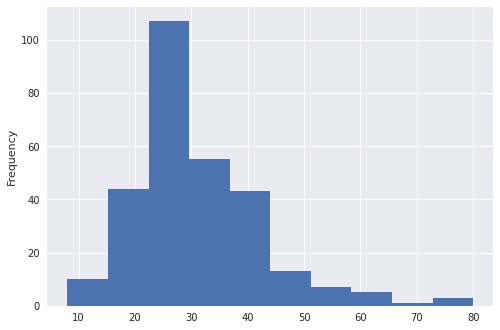

In [9]:
df.Age.plot(kind='hist')

# Insight

People who are between 20-30 are more in the dataset

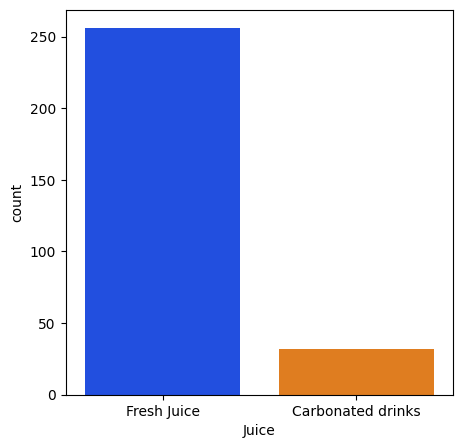

In [10]:
plt.style.use('default')


plt.figure(figsize=(5,5))
sns.countplot(x= df['Juice'] ,palette='bright')
plt.show()

<AxesSubplot:xlabel='Juice', ylabel='count'>

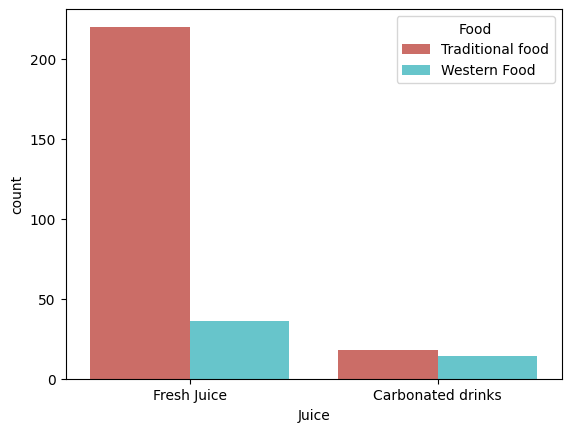

In [11]:
sns.countplot(x= df['Juice'], hue= df['Food'],palette='hls')

# Insight

From the bar graph we can infer that people who ate Traditional food have taken fresh juice. It is also notable that those who take western food have taken carbonated drinks preferably. 

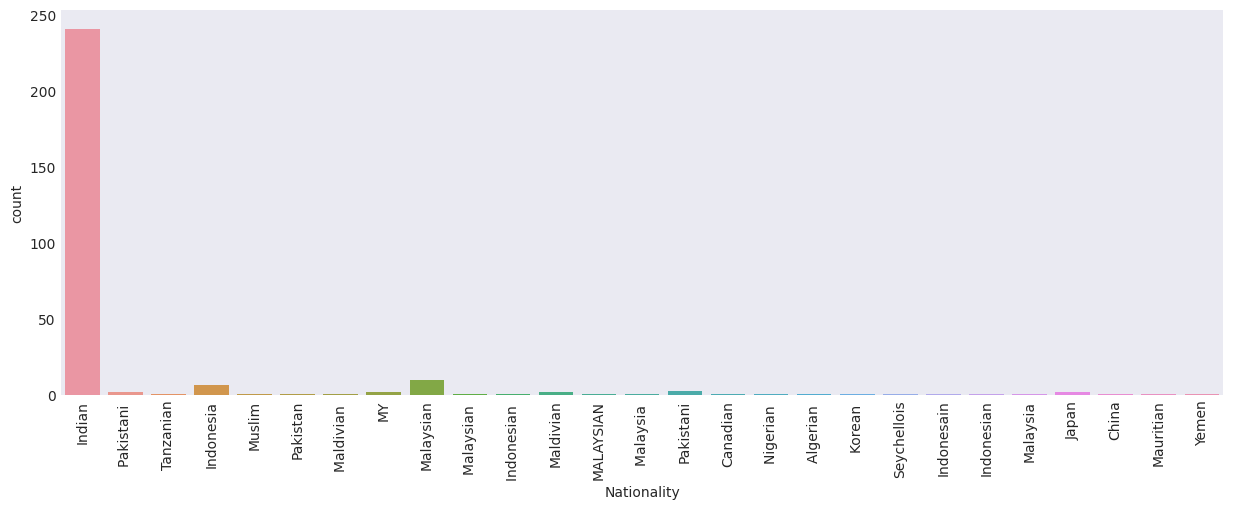

In [12]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,5))


sns.countplot(df['Nationality'])
plt.xticks(rotation= 90)
plt.show()

# Insight

we can say that Indians are in high number compared to others

In [13]:
grouped_data = df.groupby(['day','Gender','Nationality']).count()
grouped_data

Age  Food  Juice  Dessert
day       Gender Nationality                           
Friday    Female Indian         1     1      1        1
          Male   Indian        23    23     23       23
Thursday  Female Indian         6     6      6        6
          Male   Indian         1     1      1        1
Tuesday   Female Algerian       1     1      1        1
                 China          1     1      1        1
                 Indian        76    76     76       76
                 Indonesia      1     1      1        1
                 Indonesian     1     1      1        1
                 Indonesian     1     1      1        1
                 Japan          1     1      1        1
                 MY             1     1      1        1
                 Malaysian      4     4      4        4
                 Maldivian      2     2      2        2
                 Mauritian      1     1      1        1
                 Nigerian       1     1      1        1
                 Pakistani      1     1      1        1
          Male   Canadian       1     1      1        1
                 Indian        55    55     55       55
                 Indonesain     1     1      1        1
                 Indonesia      6     6      6        6
                 Japan          1     1      1        1
                 Korean         1     1      1        1
                 MALAYSIAN      1     1      1        1
                 MY             1     1      1        1
                 Malaysia       1     1      1        1
                 Malaysia       1     1      1        1
                 Malaysian      6     6      6        6
                 Malaysian      1     1      1        1
                 Maldivian      1     1      1        1
                 Pakistan       1     1      1        1
                 Pakistani      3     3      3        3
                 Pakistani      1     1      1        1
                 Seychellois    1     1      1        1
                 Tanzanian      1     1      1        1
                 Yemen          1     1      1        1
Wednesday Female Indian        66    66     66       66
          Male   Indian        10    10     10       10

In [14]:
grouped_data.reset_index(inplace = True)

In [15]:
grouped_data

,day,Gender,Nationality,Age,Food,Juice,Dessert
0,Friday,Female,Indian,1,1,1,1
1,Friday,Male,Indian,23,23,23,23
2,Thursday,Female,Indian,6,6,6,6
3,Thursday,Male,Indian,1,1,1,1
4,Tuesday,Female,Algerian,1,1,1,1
5,Tuesday,Female,China,1,1,1,1
6,Tuesday,Female,Indian,76,76,76,76
7,Tuesday,Female,Indonesia,1,1,1,1
8,Tuesday,Female,Indonesian,1,1,1,1
9,Tuesday,Female,Indonesian,1,1,1,1


In [16]:
px.treemap(grouped_data,path=['day','Gender','Nationality'])

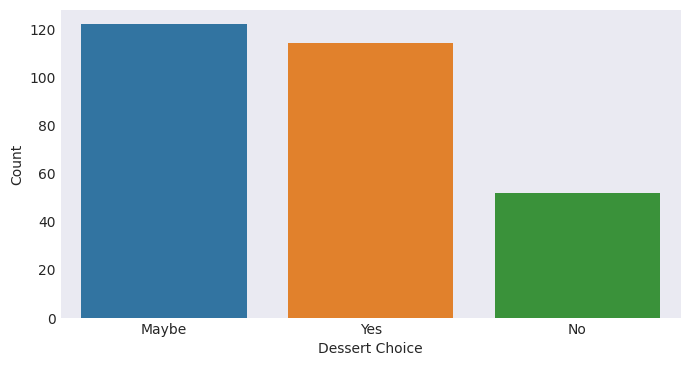

In [17]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x=df['Dessert'])
plt.xlabel('Dessert Choice')
plt.ylabel('Count')

plt.show()

In [18]:
alt.Chart(df).mark_circle().encode(x='day',y='Age',size='count(Age)').properties(
    width=800,
    height=300).interactive()

alt.Chart(...)

In [19]:
df["Nationality"].value_counts()

Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Pakistani        2
Maldivian        2
Japan            2
MY               2
Mauritian        1
Indonesian       1
Indonesain       1
Seychellois      1
Muslim           1
Indonesian       1
Malaysian        1
Tanzanian        1
Maldivian        1
Korean           1
Yemen            1
Algerian         1
Malaysia         1
MALAYSIAN        1
Malaysia         1
Canadian         1
Pakistan         1
China            1
Nigerian         1
Name: Nationality, dtype: int64

In [20]:
nat_list = df.Nationality.unique()
nat_list

array(['Indian', 'Pakistani ', 'Tanzanian', 'Indonesia', 'Muslim',
       'Pakistan', 'Maldivian ', 'MY', 'Malaysian', 'Malaysian ',
       'Indonesian ', 'Maldivian', 'MALAYSIAN', 'Malaysia ', 'Pakistani',
       'Canadian', 'Nigerian ', 'Algerian ', 'Korean ', 'Seychellois',
       'Indonesain', 'Indonesian', 'Malaysia', 'Japan', 'China',
       'Mauritian', 'Yemen'], dtype=object)

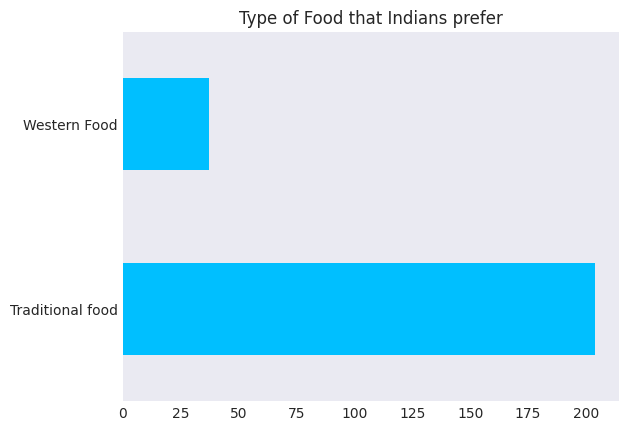

In [21]:
df[df["Nationality"]=="Indian"]["Food"].value_counts().plot(kind="barh",color="deepskyblue")
plt.title("Type of Food that Indians prefer")
plt.show()

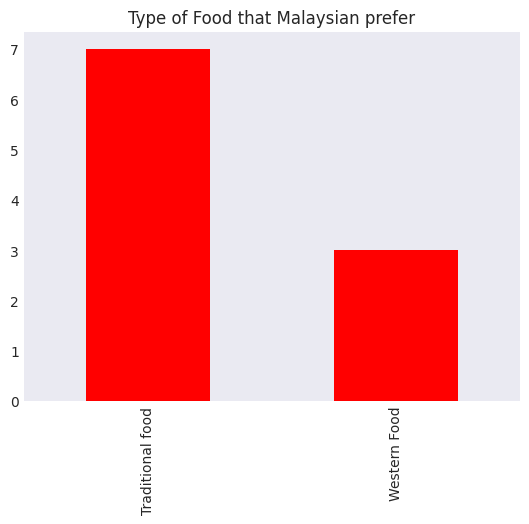

In [22]:
df[df["Nationality"]=='Malaysian']["Food"].value_counts().plot(kind="bar",color="red")
plt.title("Type of Food that Malaysian prefer")
plt.show()

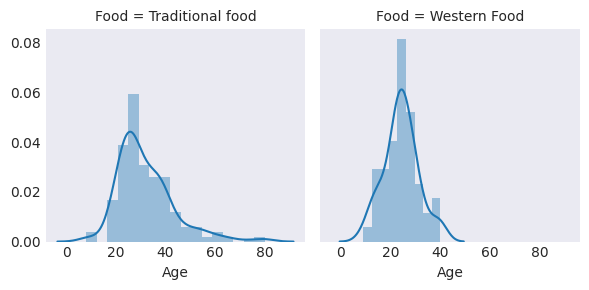

In [23]:
g = sns.FacetGrid(df, col="Food") 
g.map(sns.distplot, "Age")
plt.show()

The histogram tells that peoplewho are between 20-40 prefer a lot of western food.

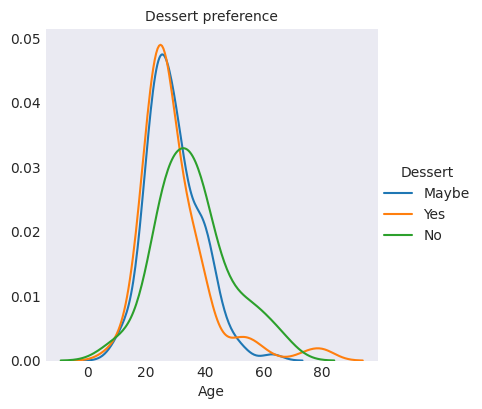

In [24]:
sns.FacetGrid(df, hue="Dessert", height=4) \
   .map(sns.kdeplot, "Age") \
   .add_legend()
plt.title("Dessert preference",size=10)
plt.show()